# **Comprehensive Exploratory Data Analysis (EDA) on Titanic Dataset**

**Objective**: Perform an in-depth EDA to uncover patterns, trends, and insights within the Titanic dataset, aiding in understanding the dataset structure and key factors influencing survival.

**Steps**:
1. Dataset Overview
2. Statistical Summary
3. Handling Missing Values
4. Univariate Analysis
5. Bivariate Analysis
6. Multivariate Analysis
7. Feature Correlations
8. Insights and Observations


### Key Questions:
- What does the dataset look like?
- How many rows and columns are there?
- What are the datatypes of each column?


In [24]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [25]:
#loading the data
df = pd.read_csv('/content/titanic_train (1).csv')

## 1. Dataset Overview

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.shape

(891, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 2. Statistical Summary

### Statistical Overview:
- Summary statistics help understand numerical distributions and identify potential outliers.


In [30]:
# Statistical summary
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## 3. Handling Missing Values

### Steps:
- Identify missing values.
- Impute or drop based on relevance.


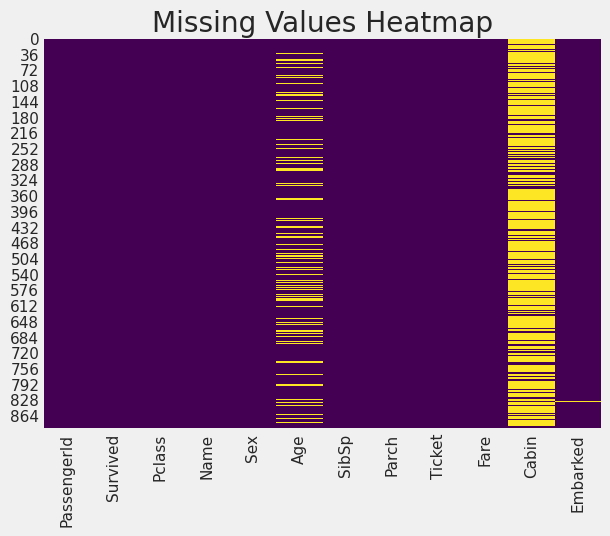

In [31]:
# Visualizing missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Imputing missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Dropping 'Cabin' due to high percentage of missing values
df.drop(columns='Cabin', inplace=True)


## 4. Univariate Analysis

### Steps:
- Analyze the distribution of single variables.
- Identify patterns and outliers.


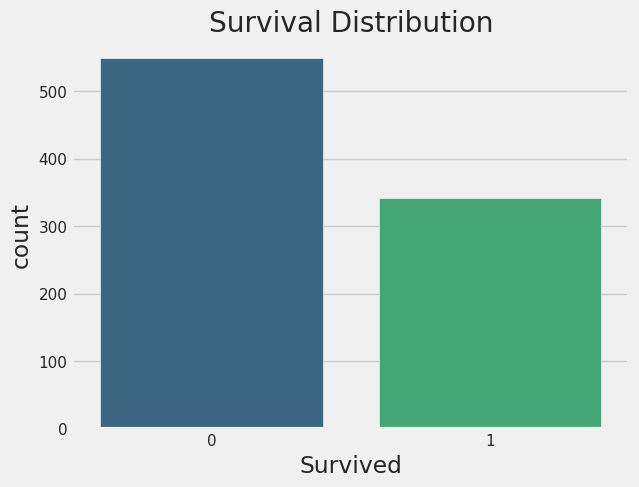

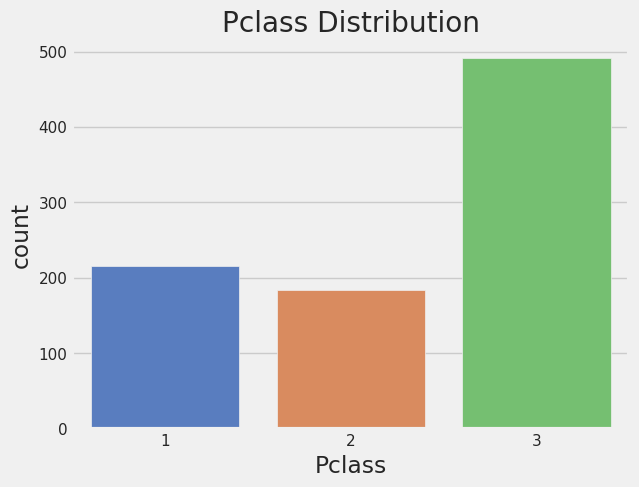

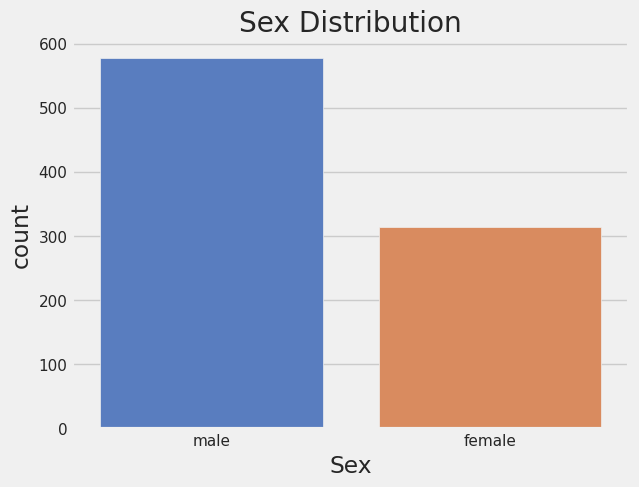

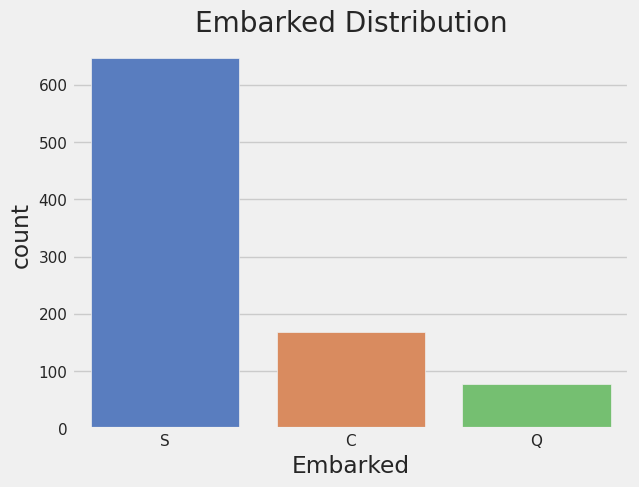

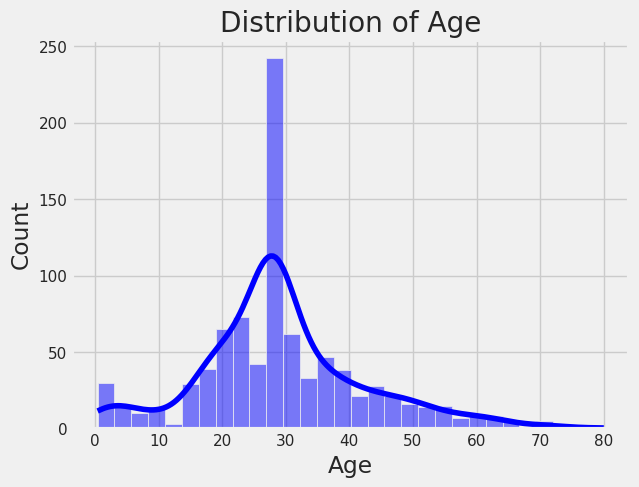

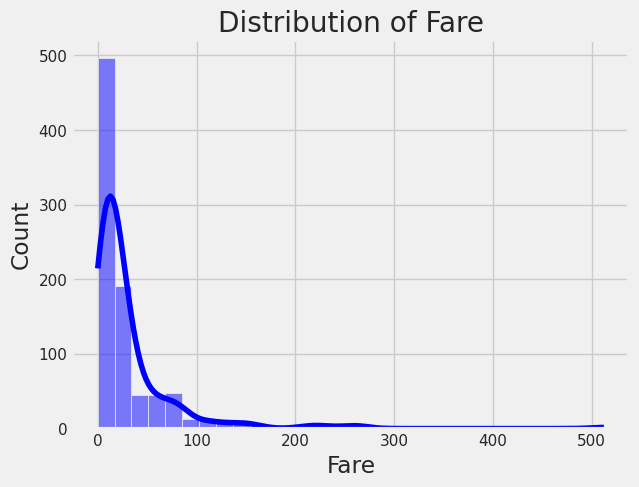

In [32]:
# Visualizing the target variable
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title("Survival Distribution")
plt.show()

# Visualizing categorical variables
cat_features = ['Pclass', 'Sex', 'Embarked']
for feature in cat_features:
    sns.countplot(x=feature, data=df, palette='muted')
    plt.title(f"{feature} Distribution")
    plt.show()

# Distribution of numerical features
num_features = ['Age', 'Fare']
for feature in num_features:
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.show()


**Insights**

1. Survival Distribution
Plot: Countplot of the Survived column.
Insight:
A majority of passengers did not survive (value = 0).
Survival rate is less than 50%, indicating the harsh conditions during the Titanic disaster.

2. Gender vs. Survival
Plot: Bar plot of Sex vs. Survived.
Insight:
Females had a significantly higher survival rate compared to males.
This reflects the "women and children first" policy followed during the evacuation.

3. Passenger Class vs. Survival
Plot: Bar plot of Pclass vs. Survived.
Insight:
Passengers in 1st class had the highest survival rate, followed by 2nd class.
3rd class passengers had the lowest survival rate.
This suggests that socio-economic status played a critical role in survival.



5. Age Distribution
Plot: Histogram of Age.
Insight:
The majority of passengers were young adults (20–40 years old).
Children (ages below 10) had a relatively higher survival rate compared to other age groups.

6. Fare Distribution
Plot: Boxplot of Fare vs. Survived.
Insight:
Passengers who paid higher fares had better survival chances.
Higher fare values are likely associated with passengers in 1st class, reinforcing the influence of socio-economic status.


## 5. Bivariate Analysis

### Steps:
- Explore relationships between two variables (target and features).


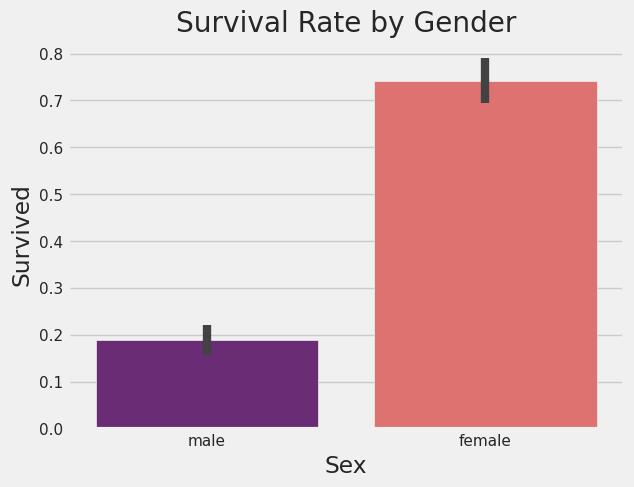

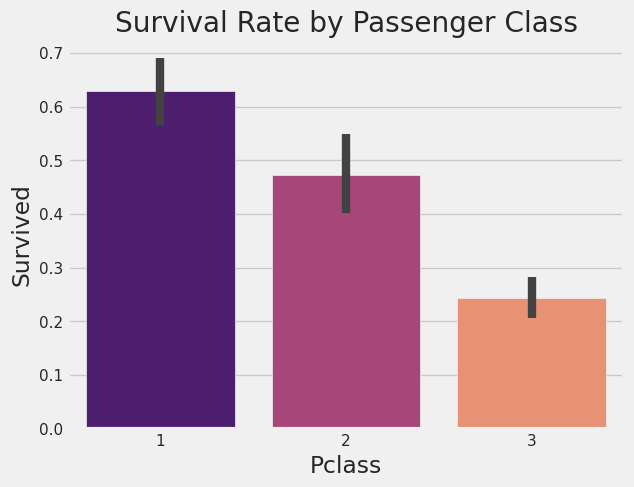

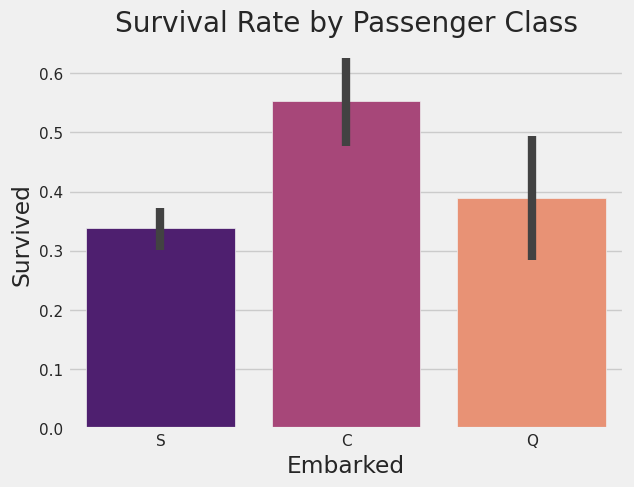

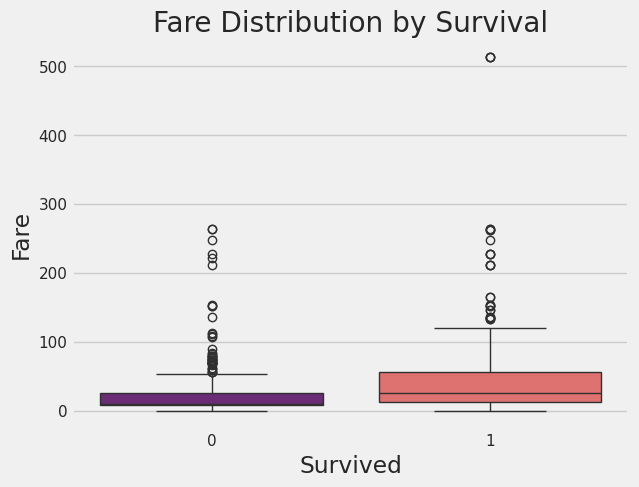

In [33]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df, palette='magma')
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df, palette='magma')
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival rate by class
sns.barplot(x='Embarked', y='Survived', data=df, palette='magma')
plt.title("Survival Rate by Passenger Class")
plt.show()

# Fare vs. Survival
sns.boxplot(x='Survived', y='Fare', data=df, palette='magma')
plt.title("Fare Distribution by Survival")
plt.show()


**Insights**

4. Embarked Location vs. Survival
Plot: Countplot of Embarked vs. Survived.
Insight:
Passengers embarking from location 'C' (Cherbourg) had a higher survival rate.
Passengers from 'S' (Southampton) had the lowest survival rate, potentially reflecting differences in class composition at each port.


6. Fare Distribution
Plot: Boxplot of Fare vs. Survived.
Insight:
Passengers who paid higher fares had better survival chances.
Higher fare values are likely associated with passengers in 1st class, reinforcing the influence of socio-economic status.



## 6. Multivariate Analysis

### Steps:
- Analyze relationships involving more than two variables.


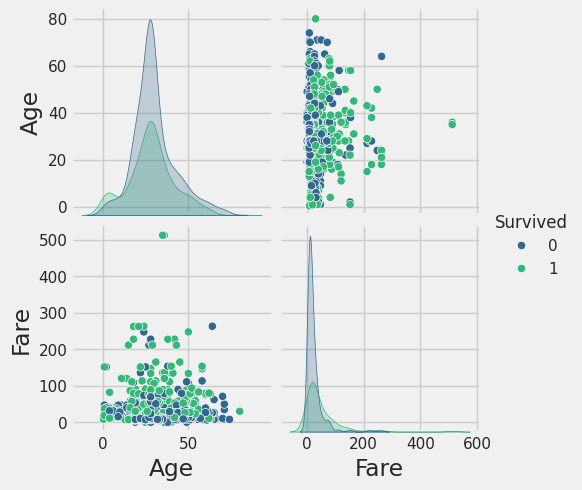

In [38]:
# Pairplot for numerical features
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare'], palette='viridis')
plt.show()


Insight:

Clear separation between survivors and non-survivors for higher fare values.
No strong relationship between Age and Survived, although children seem to survive more often.


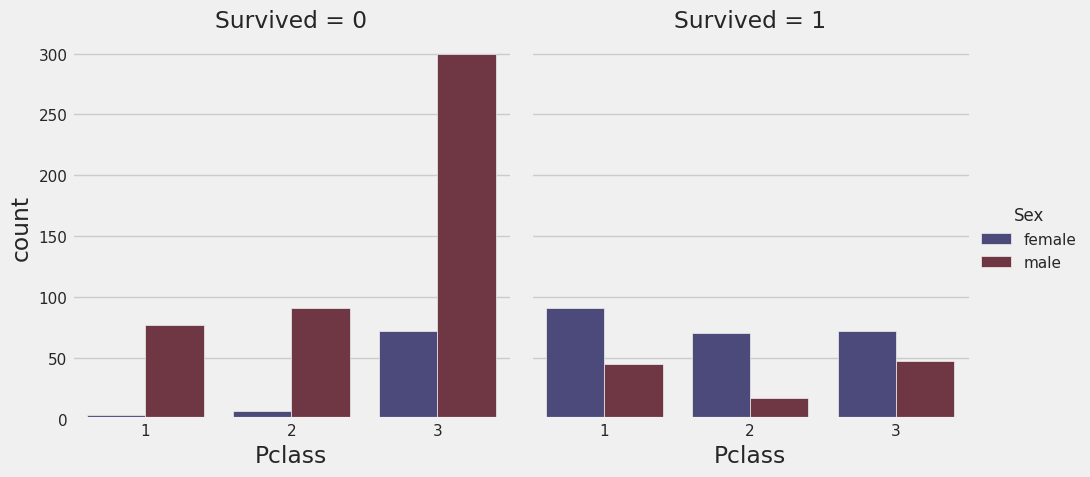

In [35]:
# Survival rate by gender and class
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count', palette='icefire')
plt.show()

**Insights**

9. Survival by Gender and Class
Plot: Categorical plot (Pclass vs. Sex grouped by Survived).
Insight:
- Women in 1st and 2nd class had the highest survival rates.
- Men in 3rd class had the lowest survival rate.
- Gender played a more significant role in survival within the same passenger class.

## 7. Feature Correlations

### Steps:
- Explore relationships between numerical features.
- Generate a heatmap of correlations.


Correlation Matrix:


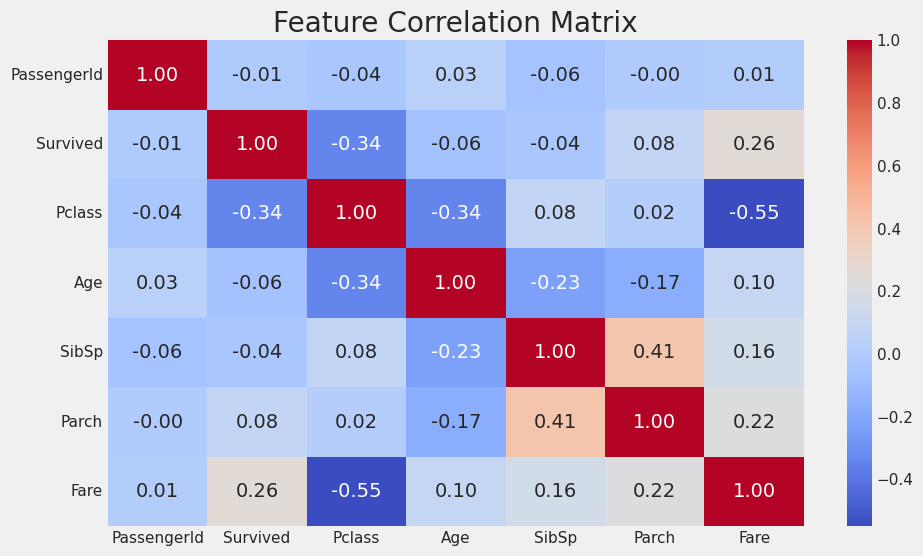

In [36]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()


Insight:
- Survival (Survived) is moderately correlated with Fare and negatively correlated with Pclass.
- Weak correlations with Age indicate it wasn’t as critical a factor as gender and class.


### **Conclusion**

The Titanic dataset analysis offers profound insights into the factors influencing passenger survival during one of history's most infamous maritime disasters. Key findings include:  

1. **Gender and Survival:**  
   - Women had a significantly higher survival rate compared to men, reflecting the prioritization of "women and children first" during evacuation procedures.  

2. **Passenger Class and Socioeconomic Status:**  
   - First-class passengers had the highest survival rates, while third-class passengers had the lowest. Socioeconomic status played a pivotal role in survival chances.  

3. **Age Factor:**  
   - Children under 10 years old had a higher likelihood of survival compared to other age groups. However, survival was less correlated with age compared to other factors.  

4. **Economic Insights (Fare):**  
   - Passengers who paid higher fares were more likely to survive, emphasizing the interplay between financial capability and access to resources during emergencies.  

5. **Embarkation Influence:**  
   - Passengers boarding from Cherbourg (`Embarked = C`) had better survival outcomes, likely due to a higher representation of first-class passengers.  

6. **Feature Interplay:**  
   - Gender, class, fare, and embarkation location together significantly influenced survival, demonstrating the complexity of human and systemic factors during crises.  

### **Final Takeaway:**  
This detailed exploratory analysis provides valuable lessons about human priorities and socio-economic disparities in survival. It also demonstrates the power of data-driven insights in uncovering narratives from historical events. By leveraging Python libraries for data analysis and visualization, we have explored the Titanic dataset comprehensively, making it an excellent foundational project for aspiring data scientists.  
